In [1]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import plotly.express as px
from sklearn.metrics import mean_squared_error
from math import sqrt

In [52]:
# load data
dropout_df = pd.read_csv('R/data/dropout_data.csv')
dropout_df = dropout_df[['YEAR', 'do_1to12', 'do_10to11', 'do_11to12']]
dropout_df = dropout_df.replace(1,np.nan)
dropout_df

,YEAR,do_1to12,do_10to11,do_11to12
0,2000,0.434262,0.194965,0.308007
1,2001,0.459500,0.222885,0.321140
2,2002,0.470781,0.264452,0.316212
3,2003,0.483975,0.332251,0.282480
4,2004,0.452501,0.308972,0.322139
5,2005,0.330197,0.276674,0.370416
6,2006,0.301473,0.262910,0.319635
7,2007,0.295451,0.256218,0.339891
8,2008,0.267238,0.219351,0.359019
9,2009,0.262871,0.253827,0.273911


In [87]:
do1to12 = dropout_df[['YEAR', 'do_1to12']].dropna()
do10to11 = dropout_df[['YEAR', 'do_10to11']].dropna()
do11to12 = dropout_df[['YEAR', 'do_11to12']].dropna()
do11to12


,YEAR,do_11to12
0,2000,0.308007
1,2001,0.321140
2,2002,0.316212
3,2003,0.282480
4,2004,0.322139
5,2005,0.370416
6,2006,0.319635
7,2007,0.339891
8,2008,0.359019
9,2009,0.273911


In [54]:
# method to make the data stationary
def subtract_from_previous(arr):
    if len(arr) == 0:
        return []

    return [arr[i] - arr[i - 1] for i in range(1, len(arr))]

[0.3492257026384762, 9.364751097702964e-07]

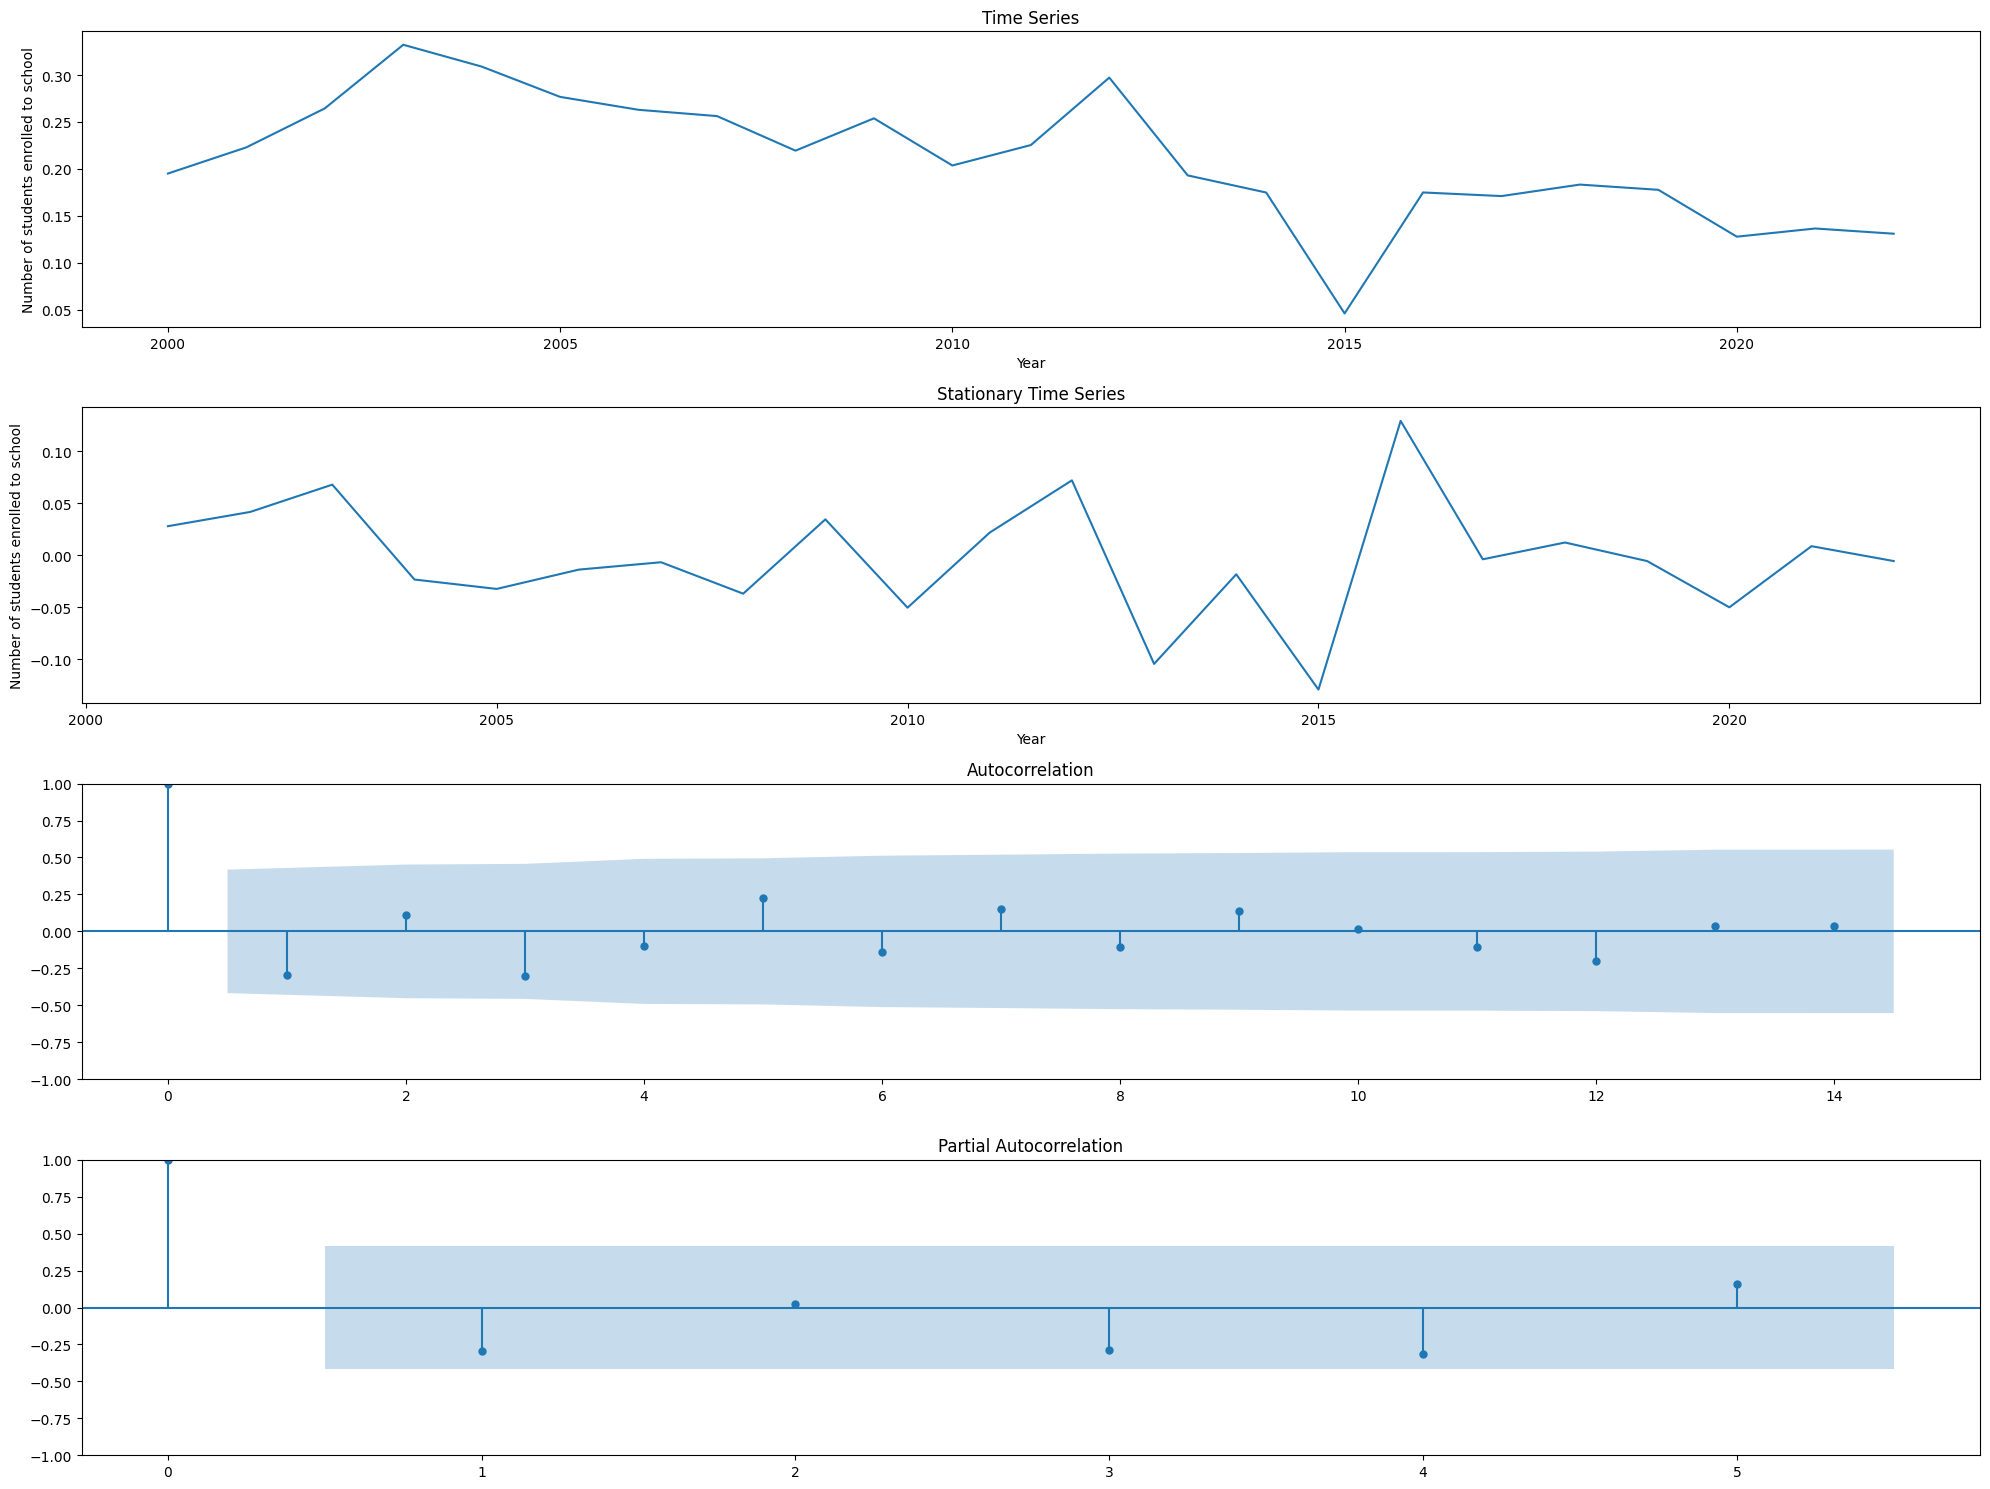

In [55]:
# This function plots time series of student enrollment for a given metro, circuit and grade
# If the time series is not stationary it is converted so that it is stationary and the stationary plot will be plotted
# the pacf and acf plots are also plotted
fig, axes = plt.subplots(4, 1, figsize=(20,15))

# def plot_learner_ts(metro, circuit, count_var):
def plot_learner_ts(df_subset):
    count_var = df_subset.iloc[:,[1]].columns.values[0]
    
    # do stationarity test (augmented Dickey-Fuller test)
    adf_val = adfuller(df_subset[str(count_var)])
    
    # if p val > 0.05 then time series is not stationary. If p value < 0.05 then it is stationary
    # if time series is stationary then convert to stationary plot
    if adf_val[1] > 0.05:
        # plot number of students over time
        axes[0].plot(df_subset['YEAR'], (df_subset[str(count_var)]))
        axes[0].set_title('Time Series')
        axes[0].set_xlabel('Year')
        axes[0].set_ylabel('Number of students enrolled to school')

        # convert time series to stationary time series
        transformed_ts = subtract_from_previous(np.array(df_subset[str(count_var)]))
        transformed_adf = adfuller(transformed_ts)

        axes[1].plot(df_subset['YEAR'][1:], transformed_ts) # time series for stationary plot
        axes[1].set_title('Stationary Time Series')
        axes[1].set_xlabel('Year')
        axes[1].set_ylabel('Number of students enrolled to school')

        # plot ACF (see https://www.youtube.com/watch?v=y8opUEd05Dg&list=PLvcbYUQ5t0UHOLnBzl46_Q6QKtFgfMGc3&index=3)
        acf_plot = plot_acf(np.array(transformed_ts), ax=axes[2]) # acf for stationary plot

        # plot PACF (see https://www.youtube.com/watch?v=y8opUEd05Dg&list=PLvcbYUQ5t0UHOLnBzl46_Q6QKtFgfMGc3&index=3)
        pacf_plot = plot_pacf(transformed_ts, lags=5, ax=axes[3]) # pacf for stationary plot
    
    # if the time series is already stationary then plot the time series, acf and pacf plots as is
    else:
        # plot number of students over time
        axes[0].plot(df_subset['YEAR'], (df_subset[str(count_var)]))
        axes[0].set_title('Time Series')
        axes[0].set_xlabel('Year')
        axes[0].set_ylabel('Number of students enrolled to school')

        # plot ACF (see https://www.youtube.com/watch?v=y8opUEd05Dg&list=PLvcbYUQ5t0UHOLnBzl46_Q6QKtFgfMGc3&index=3)
        acf_plot = plot_acf(df_subset[str(count_var)], ax=axes[2])

        # plot PACF (see https://www.youtube.com/watch?v=y8opUEd05Dg&list=PLvcbYUQ5t0UHOLnBzl46_Q6QKtFgfMGc3&index=3)
        pacf_plot = plot_pacf(df_subset[str(count_var)], lags=2, ax=axes[3])

    # plot all graphs on same grid
    plt.tight_layout()

    # return transformed adf only if the transformation needed to happen
    if adf_val[1] > 0.05:
        return [adf_val[1], transformed_adf[1]]
    else:
        return adf_val[1]

# plot_learner_ts(enrollment_subset)
plot_learner_ts(d10to11)

In [29]:
# save actual values and forecasted values to a csv
def save_output(observations, predictions, years):
    data = {'observations': observations, 'predictions': predictions, 'year': years}
    preds_df = pd.DataFrame(data)
    preds_df.to_csv('output/dropout_predictions.csv', index=False)

    return "data saved"

In [77]:
# Make predictions on data with the ARIMA model using rolling forecast

def rolling_forecast(dataframe, train_split, num_forecast, min_year, max_year):
   X = dataframe.iloc[:,[1]].values

   # print(X)

   # Split data into test and train sets
   size = int(len(X) * train_split)
   train, test = X[0:size], X[size:len(X)]

   # keep track of outputs
   history = [x for x in train] # rolling history
   predictions = list() # keep track of predictions
   preds_for_rmse = list() # keep track of predictions for rmse calculation
   observations = list()

   # rolling forecast
   for t in range(len(test)+num_forecast):
      model = ARIMA(history, order=(1,1,1)) # run the arima model on train data
      model_fit = model.fit() # fit the model
      output = model_fit.forecast() # forecast next value
      yhat = output
      predictions.append(yhat)
   
      # while model is running on known values
      if t < len(test):
         preds_for_rmse.append(yhat)
         obs = test[t]
         observations.append(obs)
         history.append(obs)
         print('predicted=%f, expected=%f' % (yhat, obs))
   
      # forecast predictions
      else:
         history.append(yhat)
         observations.append(np.nan)
         print('predicted=%f' % (yhat))

   rmse = sqrt(mean_squared_error(test, preds_for_rmse))
   print('Test RMSE: %.3f' % rmse)

   years = np.arange(min_year, max_year)

   # plot forecasts against actual outcomes
   plt.plot(test)
   plt.plot(predictions, color='red')
   plt.show()

   return observations, predictions, years


# save_output(metro_name, grade, observations, predictions, years)
# save_output(observations, predictions, years)


c:\Users\GEdwards\Python\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\GEdwards\Python\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted=0.199715, expected=0.225321
predicted=0.225108, expected=0.297229
predicted=0.301033, expected=0.192972


c:\Users\GEdwards\Python\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.221752, expected=0.174729
predicted=0.199941, expected=0.045832
predicted=0.063457, expected=0.174798
predicted=0.110226, expected=0.170940
predicted=0.178332, expected=0.183190
predicted=0.173103, expected=0.177606
predicted=0.182613, expected=0.127657
predicted=0.139122, expected=0.136375
predicted=0.130819, expected=0.130817


c:\Users\GEdwards\Python\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.133867
predicted=0.132193
predicted=0.133113
predicted=0.132607
predicted=0.132886
predicted=0.132732
predicted=0.132817
Test RMSE: 0.072


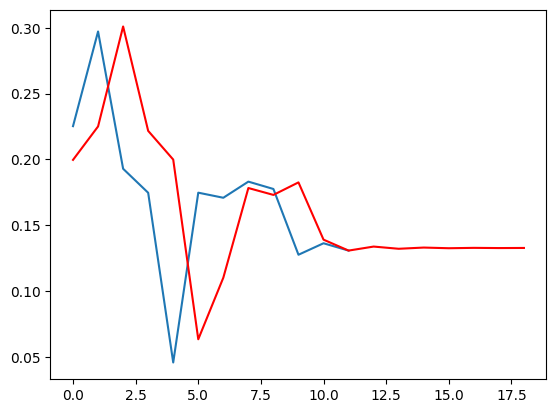

[2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024 2025
 2026 2027 2028 2029]


In [92]:
# dropout proportion from grade 10 to 11
dataframe = do10to11
train_split = 0.5
num_forecast = 7
min_year = 2012
max_year = 2030

obs, preds, years = rolling_forecast(do10to11, train_split, num_forecast, min_year, max_year)
print(years)

c:\Users\GEdwards\Python\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\GEdwards\Python\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted=0.196905, expected=0.301473
predicted=0.329147, expected=0.295451
predicted=0.284615, expected=0.267238
predicted=0.272221, expected=0.262871
predicted=0.257283, expected=0.226668
predicted=0.212307, expected=0.235849
predicted=0.253646, expected=0.200561
predicted=0.188527
predicted=0.183776
predicted=0.181879
predicted=0.181119
predicted=0.180832
predicted=0.180723
predicted=0.180681
Test RMSE: 0.049


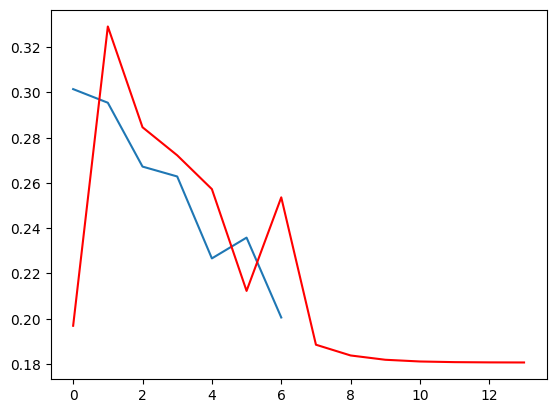

[2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]


In [90]:
# drop out proportion from grade 1 to 12
dataframe = do1to12
train_split = 0.5
num_forecast = 7
min_year = 2007
max_year = 2021

obs, preds, years = rolling_forecast(dataframe, train_split, num_forecast, min_year, max_year)
print(years)

predicted=0.320096, expected=0.285178
predicted=0.314969, expected=0.244788
predicted=0.271478, expected=0.210125
predicted=0.201640, expected=0.186031
predicted=0.193764, expected=0.066468
predicted=0.076839, expected=0.204865


c:\Users\GEdwards\Python\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\GEdwards\Python\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


predicted=0.143503, expected=0.210330
predicted=0.197738, expected=0.203299
predicted=0.202253, expected=0.184593
predicted=0.190768, expected=0.104924
predicted=0.133143, expected=0.146413
predicted=0.143825, expected=0.130004
predicted=0.134399
predicted=0.134414


c:\Users\GEdwards\Python\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=0.134417
predicted=0.134419
predicted=0.134418
predicted=0.134418
predicted=0.134418
Test RMSE: 0.068


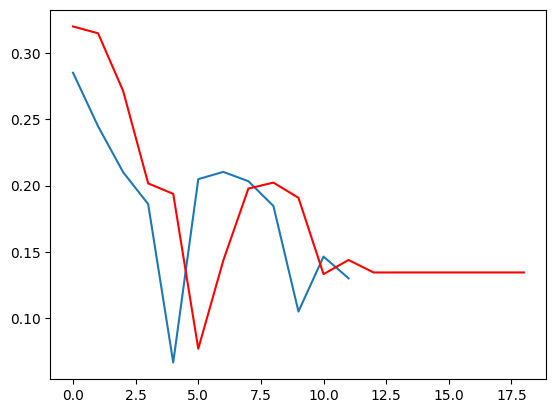

19
19


In [95]:
# drop out proportion from grade 11 to 12
dataframe = do11to12
train_split = 0.5
num_forecast = 7
min_year = 2012
max_year = 2031

obs, preds, years = rolling_forecast(dataframe, train_split, num_forecast, min_year, max_year)
print(years)